In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
from numpy import linalg as LA
from random import random

#Part 1 input data: Air temp (degC), ID (W/sqm), load resistance (ohms)
# - split into training set and a randomly slected small validation set
xdata = [[-10.0, 350, 4.464], 
  [-10.0, 650, 4.464], 
  [-10.0, 950, 4.464], 
  [-10.0, 1250, 4.464], 
  [10.0, 350, 4.464], 
  [10.0, 650, 4.464], 
  [10.0, 950, 4.464], 
  [10.0, 1250, 4.464], 
  [30.0, 350, 4.464], 
  [30.0, 650, 4.464], 
  [30.0, 950, 4.464], 
  [30.0, 1250, 4.464], 
  [-10.0, 350, 6.696], 
  [-10.0, 650, 6.696], 
  [-10.0, 950, 6.696], 
  [-10.0, 1250, 6.696], 
  [10.0, 350, 6.696], 
  [10.0, 650, 6.696], 
  [10.0, 950, 6.696], 
  [10.0, 1250, 6.696], 
  [30.0, 350, 6.696], 
  [30.0, 650, 6.696], 
  [30.0, 950, 6.696], 
  [30.0, 1250, 6.696], 
  [-10.0, 350, 8.928], 
  [-10.0, 650, 8.928], 
  [-10.0, 950, 8.928], 
  [-10.0, 1250, 8.928], 
  [10.0, 350, 8.928], 
  [10.0, 650, 8.928], 
  [10.0, 950, 8.928], 
  [10.0, 1250, 8.928], 
  [30.0, 350, 8.928], 
  [30.0, 650, 8.928], 
  [30.0, 950, 8.928], 
  [30.0, 1250, 8.928]] 
xdata1=np.array(xdata)
# Now let's standardize the data:
xdata_st = np.zeros((len(xdata1),3))
for i in range(len(xdata1)):
    xdata_st[i][0] = (xdata1[i][0] - stat.mean(xdata1[:,0]))/stat.stdev(xdata1[:,0])
    xdata_st[i][1] = (xdata1[i][1] - stat.mean(xdata1[:,1]))/stat.stdev(xdata1[:,1])
    xdata_st[i][2] = (xdata1[i][2] - stat.mean(xdata1[:,2]))/stat.stdev(xdata1[:,2])
print('Standardized Inputs [Tair,Id,Rl]:')
print(np.round(xdata_st,3))
print()







Standardized Inputs [Tair,Id,Rl]:
[[-1.208 -1.323 -1.208]
 [-1.208 -0.441 -1.208]
 [-1.208  0.441 -1.208]
 [-1.208  1.323 -1.208]
 [ 0.    -1.323 -1.208]
 [ 0.    -0.441 -1.208]
 [ 0.     0.441 -1.208]
 [ 0.     1.323 -1.208]
 [ 1.208 -1.323 -1.208]
 [ 1.208 -0.441 -1.208]
 [ 1.208  0.441 -1.208]
 [ 1.208  1.323 -1.208]
 [-1.208 -1.323 -0.   ]
 [-1.208 -0.441 -0.   ]
 [-1.208  0.441 -0.   ]
 [-1.208  1.323 -0.   ]
 [ 0.    -1.323 -0.   ]
 [ 0.    -0.441 -0.   ]
 [ 0.     0.441 -0.   ]
 [ 0.     1.323 -0.   ]
 [ 1.208 -1.323 -0.   ]
 [ 1.208 -0.441 -0.   ]
 [ 1.208  0.441 -0.   ]
 [ 1.208  1.323 -0.   ]
 [-1.208 -1.323  1.208]
 [-1.208 -0.441  1.208]
 [-1.208  0.441  1.208]
 [-1.208  1.323  1.208]
 [ 0.    -1.323  1.208]
 [ 0.    -0.441  1.208]
 [ 0.     0.441  1.208]
 [ 0.     1.323  1.208]
 [ 1.208 -1.323  1.208]
 [ 1.208 -0.441  1.208]
 [ 1.208  0.441  1.208]
 [ 1.208  1.323  1.208]]



In [ ]:
X=xdata_st
print(X.T)

[[-1.20761473e+00 -1.20761473e+00 -1.20761473e+00 -1.20761473e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.20761473e+00  1.20761473e+00  1.20761473e+00  1.20761473e+00
  -1.20761473e+00 -1.20761473e+00 -1.20761473e+00 -1.20761473e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.20761473e+00  1.20761473e+00  1.20761473e+00  1.20761473e+00
  -1.20761473e+00 -1.20761473e+00 -1.20761473e+00 -1.20761473e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.20761473e+00  1.20761473e+00  1.20761473e+00  1.20761473e+00]
 [-1.32287566e+00 -4.40958552e-01  4.40958552e-01  1.32287566e+00
  -1.32287566e+00 -4.40958552e-01  4.40958552e-01  1.32287566e+00
  -1.32287566e+00 -4.40958552e-01  4.40958552e-01  1.32287566e+00
  -1.32287566e+00 -4.40958552e-01  4.40958552e-01  1.32287566e+00
  -1.32287566e+00 -4.40958552e-01  4.40958552e-01  1.32287566e+00
  -1.32287566e+00 -4.40958552e-01  4.40958552e-01  1.32287566e+00
  -1.3228

In [ ]:
C = np.cov(X.T)  #transpose is matrix we want to work with - compute covariance matrix
print (C)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
w, v = LA.eig(C)  # get the eigenvalues w and the eigenvectors 
print (w)
print (v)

[1. 1. 1.]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
A  = np.array([v[:,2],v[:,1]])  # form the transformation matrix using eigenvectors
# for the top two eigenvalues
print(A)

[[0. 0. 1.]
 [0. 1. 0.]]


<IPython.core.display.Javascript object>


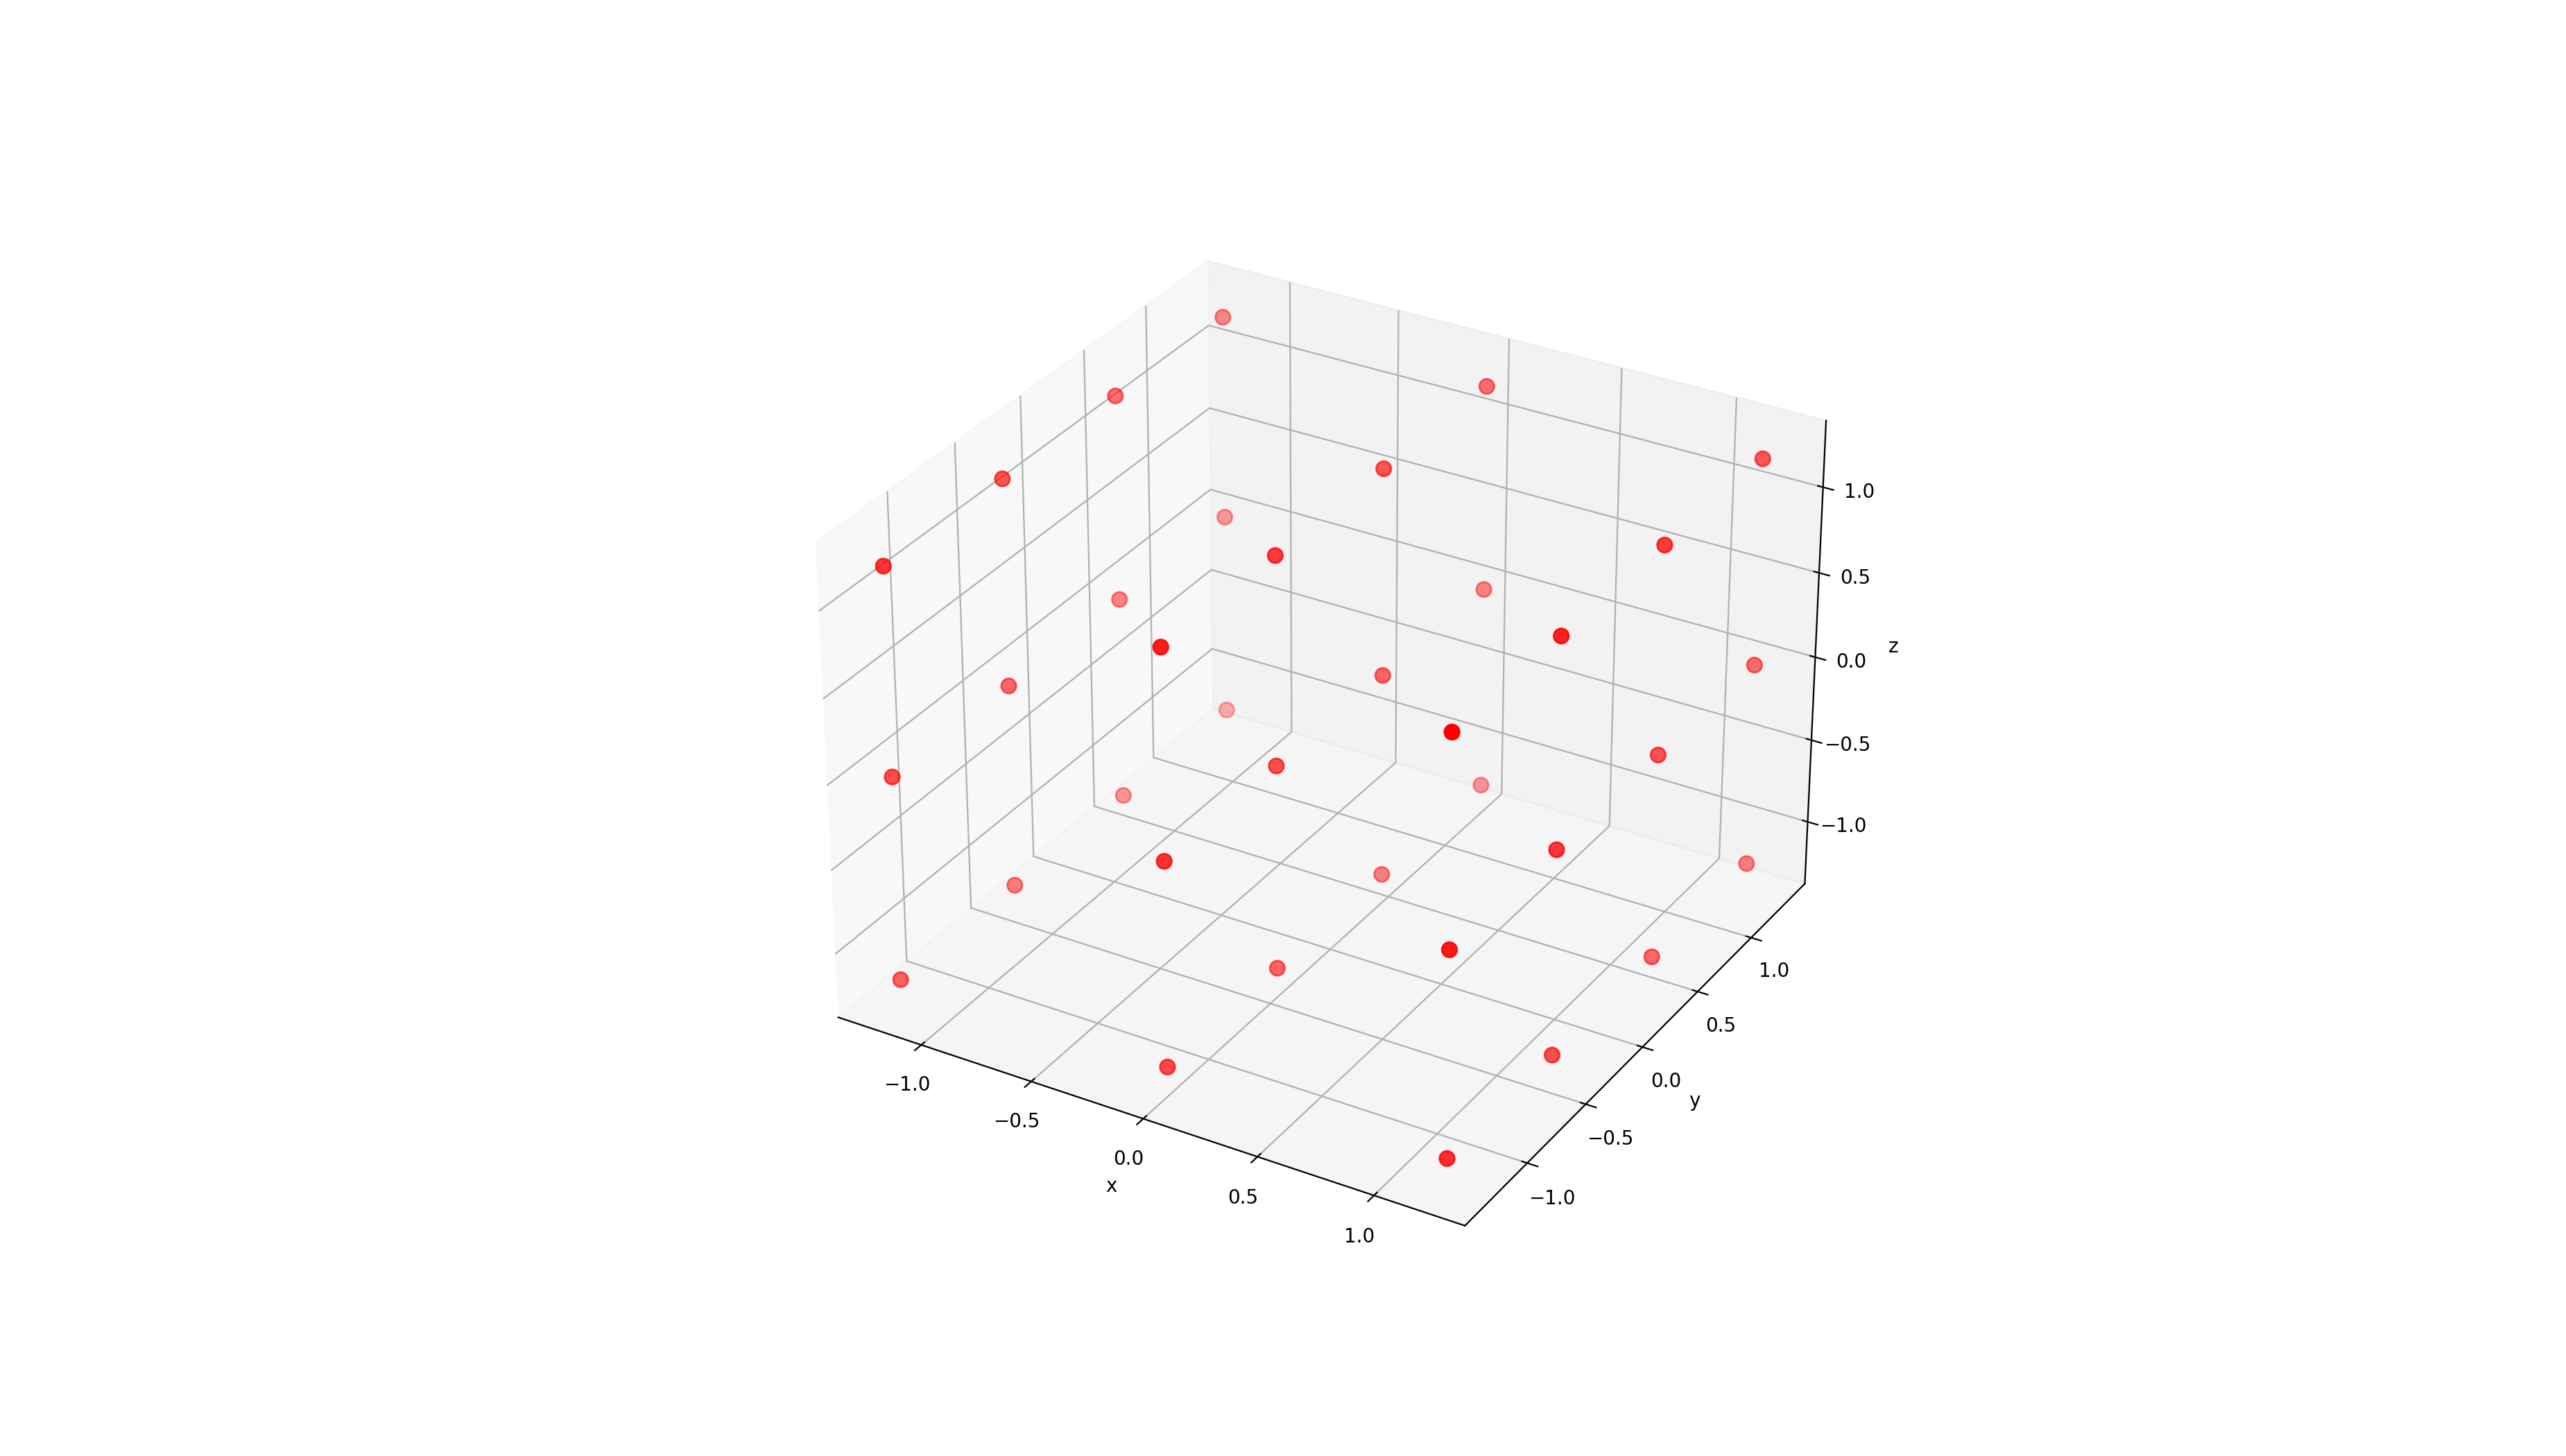

/Users/alaminesallah/opt/anaconda3/envs/Python3-7_Keras_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  if sys.path[0] == "":


In [ ]:
#P3pcaPlot1F22
# imports

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure()

ax = fig.gca(projection='3d')
fig.set_size_inches(18.5, 10.5)

x=X[:,0]
y=X[:,1]
z=X[:,2]


ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='red', s=60)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()



